In [230]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt

In [231]:
data = pd.read_csv('data.csv')

In [232]:
data.drop(columns=['Unnamed: 0'], inplace = True)

In [233]:
y = data.iloc[:, -1]

In [234]:
X = data.iloc[:, :data.shape[1] - 1]

In [235]:
cnn_par_f = {
    'window': [3, 7, 11],
    'dropout': [0.1, 0.2, 0.5]
}
cnn_par_raw= {
    'window': [3, 11, 15, 19],
    'dropout': [0.1, 0.2, 0.5]
}

In [236]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling1D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

In [237]:
from sklearn import preprocessing

In [238]:
filter_cnn = 64
num_classes = len(np.unique(y))
epochs = 25
K=10

In [239]:
pool = 3
classes = np.unique(y)
num_classes = len(classes)

In [240]:
scoring = {'f1_macro' : 'f1_macro', 'accuracy' : 'accuracy'}
for c in classes:
    def f1_class(y_true, y_pred, classes, c=c):
        return metrics.f1_score(y_true, y_pred, average=None)[c-1]
    scoring_name = 'f1_class_%d' % c
    scoring[scoring_name] = metrics.make_scorer(f1_class, classes = classes)

## Bez transformacija podataka

In [241]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, stratify = y,random_state = 1996)

In [242]:
scaler_train = preprocessing.StandardScaler()
scaler_train.fit(X_train)
X_train = scaler_train.transform(X_train)
X_test = scaler_train.transform(X_test)

In [243]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [244]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [245]:
input_shape = (X_train.shape[1], 1)

In [246]:
def mreza(input_shape, num_classes,window, dropout):
    model = Sequential()
    model.add(Conv1D(filter_cnn, window, activation='relu', input_shape=input_shape))
    model.add(Conv1D(filter_cnn, window, activation='relu'))
    model.add(MaxPooling1D(pool))
    model.add(Conv1D(filter_cnn * 2, window, activation='relu'))
    model.add(Conv1D(filter_cnn * 2, window, activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(dropout))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [247]:
from keras.wrappers.scikit_learn  import KerasClassifier
def get_estimator(window=3,dropout=0.5):
    return KerasClassifier(build_fn=mreza,input_shape=input_shape, num_classes=num_classes,window=window, dropout=dropout,epochs=epochs)

In [248]:
estimator = get_estimator()

In [249]:
grid_cnn = model_selection.GridSearchCV(estimator, param_grid=cnn_par, scoring=scoring, cv=10, refit='accuracy', return_train_score=True)

In [250]:
grid_cnn.fit(X_train, y_train)

Epoch 1/25
7245/7245 [==============================] - 15s 2ms/step - loss: 1.0781 - accuracy: 0.4910
Epoch 2/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.8183 - accuracy: 0.6288
Epoch 3/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.7740 - accuracy: 0.6349
Epoch 4/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.7289 - accuracy: 0.6584 0s - los
Epoch 5/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.6717 - accuracy: 0.6810 0s - loss: 0.6727 - accu
Epoch 6/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.6619 - accuracy: 0.6864
Epoch 7/25
7245/7245 [==============================] - 13s 2ms/step - loss: 0.6334 - accuracy: 0.6968
Epoch 8/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.6186 - accuracy: 0.7035
Epoch 9/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.6119 - accuracy: 0.7077
Epoch 10/25
7245/7245 [================

7245/7245 [==============================] - 13s 2ms/step - loss: 0.7751 - accuracy: 0.6399
Epoch 4/25
7245/7245 [==============================] - 13s 2ms/step - loss: 0.7302 - accuracy: 0.6592
Epoch 5/25
7245/7245 [==============================] - 13s 2ms/step - loss: 0.6771 - accuracy: 0.6727
Epoch 6/25
7245/7245 [==============================] - 13s 2ms/step - loss: 0.6581 - accuracy: 0.6849
Epoch 7/25
7245/7245 [==============================] - 13s 2ms/step - loss: 0.6368 - accuracy: 0.6930
Epoch 8/25
7245/7245 [==============================] - 13s 2ms/step - loss: 0.6237 - accuracy: 0.6916
Epoch 9/25
7245/7245 [==============================] - 13s 2ms/step - loss: 0.6224 - accuracy: 0.7013
Epoch 10/25
7245/7245 [==============================] - 13s 2ms/step - loss: 0.6083 - accuracy: 0.7081
Epoch 11/25
7245/7245 [==============================] - 13s 2ms/step - loss: 0.6054 - accuracy: 0.7092
Epoch 12/25
7245/7245 [==============================] - 13s 2ms/step - loss: 0.59

7245/7245 [==============================] - 14s 2ms/step - loss: 0.6365 - accuracy: 0.6981
Epoch 7/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.6302 - accuracy: 0.6980
Epoch 8/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.6131 - accuracy: 0.7041
Epoch 9/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.6038 - accuracy: 0.7084
Epoch 10/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.5953 - accuracy: 0.7108
Epoch 11/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.5811 - accuracy: 0.7166
Epoch 12/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.5862 - accuracy: 0.7148
Epoch 13/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.5646 - accuracy: 0.7280
Epoch 14/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.5746 - accuracy: 0.7217
Epoch 15/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0

7245/7245 [==============================] - 14s 2ms/step - loss: 0.6056 - accuracy: 0.7072 0s - loss: 0.6065 - 
Epoch 10/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.5869 - accuracy: 0.7136
Epoch 11/25
7245/7245 [==============================] - 13s 2ms/step - loss: 0.5780 - accuracy: 0.7139
Epoch 12/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.5661 - accuracy: 0.7260
Epoch 13/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.5628 - accuracy: 0.7270
Epoch 14/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.5446 - accuracy: 0.7328 0s - loss: 0.5445 - accuracy: 
Epoch 15/25
7245/7245 [==============================] - 13s 2ms/step - loss: 0.5269 - accuracy: 0.7426
Epoch 16/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.5201 - accuracy: 0.7420
Epoch 17/25
7245/7245 [==============================] - 14s 2ms/step - loss: 0.5160 - accuracy: 0.7551
Epoch 18/25
7245/7245 [=

7245/7245 [==============================] - 22s 3ms/step - loss: 0.5240 - accuracy: 0.7498
Epoch 13/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.5287 - accuracy: 0.7545
Epoch 14/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.5156 - accuracy: 0.7596
Epoch 15/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.5007 - accuracy: 0.7674
Epoch 16/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.4920 - accuracy: 0.7732
Epoch 17/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.4866 - accuracy: 0.7797
Epoch 18/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.4741 - accuracy: 0.7815
Epoch 19/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.4640 - accuracy: 0.7829
Epoch 20/25
7245/7245 [==============================] - 22s 3ms/step - loss: 0.4571 - accuracy: 0.7921
Epoch 21/25
7245/7245 [==============================] - 22s 3ms/step - loss

7245/7245 [==============================] - 25s 3ms/step - loss: 0.4842 - accuracy: 0.7765
Epoch 17/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4692 - accuracy: 0.7845
Epoch 18/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4680 - accuracy: 0.7879
Epoch 19/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.4552 - accuracy: 0.7924
Epoch 20/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4479 - accuracy: 0.7993
Epoch 21/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4424 - accuracy: 0.8057
Epoch 22/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.4403 - accuracy: 0.8014
Epoch 23/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4238 - accuracy: 0.8110
Epoch 24/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.4354 - accuracy: 0.8084
Epoch 25/25
7245/7245 [==============================] - 25s 3ms/step - loss

7245/7245 [==============================] - 24s 3ms/step - loss: 0.4631 - accuracy: 0.7847
Epoch 21/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.4565 - accuracy: 0.7927
Epoch 22/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.4529 - accuracy: 0.7942
Epoch 23/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.4387 - accuracy: 0.8018
Epoch 24/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.4706 - accuracy: 0.7908
Epoch 25/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.4497 - accuracy: 0.7953
Epoch 1/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.9940 - accuracy: 0.5402
Epoch 2/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.6962 - accuracy: 0.6689
Epoch 3/25
7245/7245 [==============================] - 24s 3ms/step - loss: 0.6419 - accuracy: 0.6925
Epoch 4/25
7245/7245 [==============================] - 25s 3ms/step - loss: 0.

7245/7245 [==============================] - 32s 4ms/step - loss: 0.3210 - accuracy: 0.8599
Epoch 25/25
7245/7245 [==============================] - 33s 5ms/step - loss: 0.3032 - accuracy: 0.8657
Epoch 1/25
7245/7245 [==============================] - 33s 5ms/step - loss: 0.9185 - accuracy: 0.5696
Epoch 2/25
7245/7245 [==============================] - 33s 5ms/step - loss: 0.7153 - accuracy: 0.6607
Epoch 3/25
7245/7245 [==============================] - 33s 5ms/step - loss: 0.6466 - accuracy: 0.6928
Epoch 4/25
7245/7245 [==============================] - 33s 4ms/step - loss: 0.6231 - accuracy: 0.7009
Epoch 5/25
7245/7245 [==============================] - 32s 4ms/step - loss: 0.6041 - accuracy: 0.7132
Epoch 6/25
7245/7245 [==============================] - 33s 5ms/step - loss: 0.5902 - accuracy: 0.7195
Epoch 7/25
7245/7245 [==============================] - 33s 5ms/step - loss: 0.5584 - accuracy: 0.7413
Epoch 8/25
7245/7245 [==============================] - 32s 4ms/step - loss: 0.5509

7245/7245 [==============================] - 37s 5ms/step - loss: 0.6739 - accuracy: 0.6693
Epoch 4/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.6319 - accuracy: 0.6963
Epoch 5/25
7245/7245 [==============================] - 37s 5ms/step - loss: 0.6086 - accuracy: 0.7074
Epoch 6/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.5795 - accuracy: 0.7289
Epoch 7/25
7245/7245 [==============================] - 37s 5ms/step - loss: 0.5631 - accuracy: 0.7346
Epoch 8/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.5445 - accuracy: 0.7440
Epoch 9/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.5348 - accuracy: 0.7518
Epoch 10/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.5121 - accuracy: 0.7586
Epoch 11/25
7245/7245 [==============================] - 37s 5ms/step - loss: 0.4894 - accuracy: 0.7763
Epoch 12/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.48

7245/7245 [==============================] - 36s 5ms/step - loss: 0.6006 - accuracy: 0.7227
Epoch 7/25
7245/7245 [==============================] - 35s 5ms/step - loss: 0.5742 - accuracy: 0.7378
Epoch 8/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.5552 - accuracy: 0.7343
Epoch 9/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.5478 - accuracy: 0.7474
Epoch 10/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.5563 - accuracy: 0.7491
Epoch 11/25
7245/7245 [==============================] - 35s 5ms/step - loss: 0.5327 - accuracy: 0.7561
Epoch 12/25
7245/7245 [==============================] - 35s 5ms/step - loss: 0.4977 - accuracy: 0.7752
Epoch 13/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.4857 - accuracy: 0.7757
Epoch 14/25
7245/7245 [==============================] - 35s 5ms/step - loss: 0.4889 - accuracy: 0.7810
Epoch 15/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0

7245/7245 [==============================] - 16s 2ms/step - loss: 0.6087 - accuracy: 0.7056
Epoch 10/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5902 - accuracy: 0.7097
Epoch 11/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.5849 - accuracy: 0.7097
Epoch 12/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.5634 - accuracy: 0.7179
Epoch 13/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5549 - accuracy: 0.7206
Epoch 14/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5460 - accuracy: 0.7263
Epoch 15/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.5422 - accuracy: 0.7353
Epoch 16/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.5305 - accuracy: 0.7369
Epoch 17/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5261 - accuracy: 0.7424
Epoch 18/25
7245/7245 [==============================] - 16s 2ms/step - loss

7245/7245 [==============================] - 15s 2ms/step - loss: 0.5614 - accuracy: 0.7238
Epoch 14/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5497 - accuracy: 0.7293
Epoch 15/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5409 - accuracy: 0.7347
Epoch 16/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.5254 - accuracy: 0.7358
Epoch 17/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.5259 - accuracy: 0.7422
Epoch 18/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.5153 - accuracy: 0.7413
Epoch 19/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5179 - accuracy: 0.7453
Epoch 20/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.4988 - accuracy: 0.7556
Epoch 21/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.4911 - accuracy: 0.7578
Epoch 22/25
7245/7245 [==============================] - 15s 2ms/step - loss

7245/7245 [==============================] - 15s 2ms/step - loss: 0.5679 - accuracy: 0.7256
Epoch 18/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5672 - accuracy: 0.7289
Epoch 19/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5581 - accuracy: 0.7280
Epoch 20/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.5526 - accuracy: 0.7322
Epoch 21/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5518 - accuracy: 0.7313
Epoch 22/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5472 - accuracy: 0.7415
Epoch 23/25
7245/7245 [==============================] - 15s 2ms/step - loss: 0.5397 - accuracy: 0.7343
Epoch 24/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5355 - accuracy: 0.7408
Epoch 25/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.5202 - accuracy: 0.7448
Epoch 1/25
7245/7245 [==============================] - 15s 2ms/step - loss:

7245/7245 [==============================] - 28s 4ms/step - loss: 0.4629 - accuracy: 0.7832
Epoch 22/25
7245/7245 [==============================] - 28s 4ms/step - loss: 0.4604 - accuracy: 0.7854
Epoch 23/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.4817 - accuracy: 0.7794
Epoch 24/25
7245/7245 [==============================] - 28s 4ms/step - loss: 0.4446 - accuracy: 0.7965
Epoch 25/25
7245/7245 [==============================] - 28s 4ms/step - loss: 0.4345 - accuracy: 0.7964
Epoch 1/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.9671 - accuracy: 0.5560
Epoch 2/25
7245/7245 [==============================] - 28s 4ms/step - loss: 0.7002 - accuracy: 0.6669
Epoch 3/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.6763 - accuracy: 0.6704
Epoch 4/25
7245/7245 [==============================] - 28s 4ms/step - loss: 0.6281 - accuracy: 0.6992
Epoch 5/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.6

7245/7245 [==============================] - 27s 4ms/step - loss: 0.4544 - accuracy: 0.7899
Epoch 1/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.9996 - accuracy: 0.5463
Epoch 2/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.7012 - accuracy: 0.6624
Epoch 3/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.6497 - accuracy: 0.6828
Epoch 4/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.6435 - accuracy: 0.6827
Epoch 5/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.6354 - accuracy: 0.6945
Epoch 6/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.6062 - accuracy: 0.7067
Epoch 7/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.5892 - accuracy: 0.7157
Epoch 8/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.5777 - accuracy: 0.7182
Epoch 9/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.5612 

7245/7245 [==============================] - 26s 4ms/step - loss: 0.6284 - accuracy: 0.7052
Epoch 5/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.6000 - accuracy: 0.7118
Epoch 6/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.5916 - accuracy: 0.7227
Epoch 7/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.5907 - accuracy: 0.7224
Epoch 8/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.5676 - accuracy: 0.7317
Epoch 9/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.5528 - accuracy: 0.7413
Epoch 10/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.5491 - accuracy: 0.7434
Epoch 11/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.5399 - accuracy: 0.7480
Epoch 12/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.5300 - accuracy: 0.7474
Epoch 13/25
7245/7245 [==============================] - 26s 4ms/step - loss: 0.5

7245/7245 [==============================] - 32s 4ms/step - loss: 0.5783 - accuracy: 0.7226
Epoch 9/25
7245/7245 [==============================] - 32s 4ms/step - loss: 0.5578 - accuracy: 0.7394
Epoch 10/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.5370 - accuracy: 0.7480
Epoch 11/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.5268 - accuracy: 0.7565
Epoch 12/25
7245/7245 [==============================] - 32s 4ms/step - loss: 0.5088 - accuracy: 0.7586
Epoch 13/25
7245/7245 [==============================] - 34s 5ms/step - loss: 0.4987 - accuracy: 0.7687
Epoch 14/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.4705 - accuracy: 0.7840
Epoch 15/25
7245/7245 [==============================] - 35s 5ms/step - loss: 0.4706 - accuracy: 0.7826
Epoch 16/25
7245/7245 [==============================] - 34s 5ms/step - loss: 0.4577 - accuracy: 0.7921
Epoch 17/25
7245/7245 [==============================] - 31s 4ms/step - loss:

7245/7245 [==============================] - 36s 5ms/step - loss: 0.5339 - accuracy: 0.7503
Epoch 12/25
7245/7245 [==============================] - 31s 4ms/step - loss: 0.5552 - accuracy: 0.7429
Epoch 13/25
7245/7245 [==============================] - 32s 4ms/step - loss: 0.5204 - accuracy: 0.7484
Epoch 14/25
7245/7245 [==============================] - 32s 4ms/step - loss: 0.5014 - accuracy: 0.7703
Epoch 15/25
7245/7245 [==============================] - 34s 5ms/step - loss: 0.4894 - accuracy: 0.7692
Epoch 16/25
7245/7245 [==============================] - 46s 6ms/step - loss: 0.4746 - accuracy: 0.7742
Epoch 17/25
7245/7245 [==============================] - 35s 5ms/step - loss: 0.4625 - accuracy: 0.7823
Epoch 18/25
7245/7245 [==============================] - 34s 5ms/step - loss: 0.4503 - accuracy: 0.7894
Epoch 19/25
7245/7245 [==============================] - 38s 5ms/step - loss: 0.4660 - accuracy: 0.7894
Epoch 20/25
7245/7245 [==============================] - 40s 6ms/step - loss

7245/7245 [==============================] - 35s 5ms/step - loss: 0.4848 - accuracy: 0.7754
Epoch 15/25
7245/7245 [==============================] - 35s 5ms/step - loss: 0.4690 - accuracy: 0.7819
Epoch 16/25
7245/7245 [==============================] - 37s 5ms/step - loss: 0.4585 - accuracy: 0.7903
Epoch 17/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.4461 - accuracy: 0.7954
Epoch 18/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.4270 - accuracy: 0.8040
Epoch 19/25
7245/7245 [==============================] - 35s 5ms/step - loss: 0.4159 - accuracy: 0.8065
Epoch 20/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.4169 - accuracy: 0.8086
Epoch 21/25
7245/7245 [==============================] - 35s 5ms/step - loss: 0.4009 - accuracy: 0.8174
Epoch 22/25
7245/7245 [==============================] - 44s 6ms/step - loss: 0.3811 - accuracy: 0.8301
Epoch 23/25
7245/7245 [==============================] - 44s 6ms/step - loss

7245/7245 [==============================] - 34s 5ms/step - loss: 0.4407 - accuracy: 0.8043
Epoch 19/25
7245/7245 [==============================] - 34s 5ms/step - loss: 0.4029 - accuracy: 0.8152
Epoch 20/25
7245/7245 [==============================] - 34s 5ms/step - loss: 0.4104 - accuracy: 0.8159
Epoch 21/25
7245/7245 [==============================] - 34s 5ms/step - loss: 0.4001 - accuracy: 0.8163
Epoch 22/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.3737 - accuracy: 0.8335
Epoch 23/25
7245/7245 [==============================] - 34s 5ms/step - loss: 0.3622 - accuracy: 0.8385
Epoch 24/25
7245/7245 [==============================] - 34s 5ms/step - loss: 0.3403 - accuracy: 0.8479
Epoch 25/25
7245/7245 [==============================] - 34s 5ms/step - loss: 0.3253 - accuracy: 0.8555
Epoch 1/25
7245/7245 [==============================] - 15s 2ms/step - loss: 1.1415 - accuracy: 0.4685
Epoch 2/25
7245/7245 [==============================] - 15s 2ms/step - loss: 

7245/7245 [==============================] - 17s 2ms/step - loss: 0.5495 - accuracy: 0.7342
Epoch 23/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.5476 - accuracy: 0.7266
Epoch 24/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.5350 - accuracy: 0.7329
Epoch 25/25
7245/7245 [==============================] - 17s 2ms/step - loss: 0.5281 - accuracy: 0.7383
Epoch 1/25
7245/7245 [==============================] - 16s 2ms/step - loss: 1.1000 - accuracy: 0.4867
Epoch 2/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.8786 - accuracy: 0.6001
Epoch 3/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.8233 - accuracy: 0.6217
Epoch 4/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.7766 - accuracy: 0.6502
Epoch 5/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.7300 - accuracy: 0.6544
Epoch 6/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.70

7245/7245 [==============================] - 16s 2ms/step - loss: 0.5468 - accuracy: 0.7337
Epoch 1/25
7245/7245 [==============================] - 17s 2ms/step - loss: 1.0797 - accuracy: 0.4991
Epoch 2/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.8771 - accuracy: 0.6086
Epoch 3/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.8265 - accuracy: 0.6235
Epoch 4/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.7923 - accuracy: 0.6322
Epoch 5/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.7399 - accuracy: 0.6484
Epoch 6/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.7011 - accuracy: 0.6674
Epoch 7/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.6619 - accuracy: 0.6890
Epoch 8/25
7245/7245 [==============================] - 20s 3ms/step - loss: 0.6546 - accuracy: 0.6973
Epoch 9/25
7245/7245 [==============================] - 19s 3ms/step - loss: 0.6407 

7245/7245 [==============================] - 16s 2ms/step - loss: 0.8265 - accuracy: 0.6236
Epoch 4/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.7794 - accuracy: 0.6417
Epoch 5/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.7491 - accuracy: 0.6411
Epoch 6/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.7031 - accuracy: 0.6671
Epoch 7/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.6771 - accuracy: 0.6807
Epoch 8/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.6532 - accuracy: 0.6852
Epoch 9/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.6549 - accuracy: 0.6921
Epoch 10/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.6400 - accuracy: 0.6963
Epoch 11/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.6266 - accuracy: 0.6994
Epoch 12/25
7245/7245 [==============================] - 16s 2ms/step - loss: 0.62

7245/7245 [==============================] - 29s 4ms/step - loss: 0.6199 - accuracy: 0.7045
Epoch 8/25
7245/7245 [==============================] - 29s 4ms/step - loss: 0.6078 - accuracy: 0.7118
Epoch 9/25
7245/7245 [==============================] - 29s 4ms/step - loss: 0.5932 - accuracy: 0.7182
Epoch 10/25
7245/7245 [==============================] - 29s 4ms/step - loss: 0.5857 - accuracy: 0.7206
Epoch 11/25
7245/7245 [==============================] - 28s 4ms/step - loss: 0.5698 - accuracy: 0.7315
Epoch 12/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.5839 - accuracy: 0.7197
Epoch 13/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.5774 - accuracy: 0.7209
Epoch 14/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.5593 - accuracy: 0.7369
Epoch 15/25
7245/7245 [==============================] - 27s 4ms/step - loss: 0.5496 - accuracy: 0.7438
Epoch 16/25
7245/7245 [==============================] - 27s 4ms/step - loss: 

7245/7245 [==============================] - 29s 4ms/step - loss: 0.5740 - accuracy: 0.7284
Epoch 12/25
7245/7245 [==============================] - 31s 4ms/step - loss: 0.5614 - accuracy: 0.7275
Epoch 13/25
7245/7245 [==============================] - 29s 4ms/step - loss: 0.5550 - accuracy: 0.7300
Epoch 14/25
7245/7245 [==============================] - 28s 4ms/step - loss: 0.5342 - accuracy: 0.7415
Epoch 15/25
7245/7245 [==============================] - 28s 4ms/step - loss: 0.5353 - accuracy: 0.7426
Epoch 16/25
7245/7245 [==============================] - 28s 4ms/step - loss: 0.5327 - accuracy: 0.7467
Epoch 17/25
7245/7245 [==============================] - 29s 4ms/step - loss: 0.5287 - accuracy: 0.7481
Epoch 18/25
7245/7245 [==============================] - 32s 4ms/step - loss: 0.5122 - accuracy: 0.7543
Epoch 19/25
7245/7245 [==============================] - 28s 4ms/step - loss: 0.5082 - accuracy: 0.7556
Epoch 20/25
7245/7245 [==============================] - 28s 4ms/step - loss

7245/7245 [==============================] - 28s 4ms/step - loss: 0.5395 - accuracy: 0.7455
Epoch 16/25
7245/7245 [==============================] - 29s 4ms/step - loss: 0.5253 - accuracy: 0.7485
Epoch 17/25
7245/7245 [==============================] - 31s 4ms/step - loss: 0.5485 - accuracy: 0.7455
Epoch 18/25
7245/7245 [==============================] - 29s 4ms/step - loss: 0.5105 - accuracy: 0.7645
Epoch 19/25
7245/7245 [==============================] - 30s 4ms/step - loss: 0.5064 - accuracy: 0.7619
Epoch 20/25
7245/7245 [==============================] - 28s 4ms/step - loss: 0.5018 - accuracy: 0.7655
Epoch 21/25
7245/7245 [==============================] - 29s 4ms/step - loss: 0.4941 - accuracy: 0.7710
Epoch 22/25
7245/7245 [==============================] - 29s 4ms/step - loss: 0.4893 - accuracy: 0.7734
Epoch 23/25
7245/7245 [==============================] - 29s 4ms/step - loss: 0.4816 - accuracy: 0.7741
Epoch 24/25
7245/7245 [==============================] - 26s 4ms/step - loss

Epoch 19/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.4662 - accuracy: 0.7847
Epoch 20/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.4573 - accuracy: 0.7833
Epoch 21/25
7245/7245 [==============================] - 37s 5ms/step - loss: 0.4325 - accuracy: 0.7974
Epoch 22/25
7245/7245 [==============================] - 34s 5ms/step - loss: 0.4355 - accuracy: 0.8001
Epoch 23/25
7245/7245 [==============================] - 34s 5ms/step - loss: 0.4114 - accuracy: 0.8086
Epoch 24/25
7245/7245 [==============================] - 34s 5ms/step - loss: 0.4072 - accuracy: 0.8139
Epoch 25/25
7245/7245 [==============================] - 34s 5ms/step - loss: 0.4007 - accuracy: 0.8144
Epoch 1/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.9895 - accuracy: 0.5532
Epoch 2/25
7245/7245 [==============================] - 37s 5ms/step - loss: 0.7315 - accuracy: 0.6552
Epoch 3/25
7245/7245 [==============================] - 39s 5ms/st

7245/7245 [==============================] - 38s 5ms/step - loss: 0.4267 - accuracy: 0.8116
Epoch 24/25
7245/7245 [==============================] - 40s 6ms/step - loss: 0.3991 - accuracy: 0.8182
Epoch 25/25
7245/7245 [==============================] - 37s 5ms/step - loss: 0.3900 - accuracy: 0.8282
Epoch 1/25
7245/7245 [==============================] - 38s 5ms/step - loss: 1.0593 - accuracy: 0.5165
Epoch 2/25
7245/7245 [==============================] - 38s 5ms/step - loss: 0.7454 - accuracy: 0.6403
Epoch 3/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.7109 - accuracy: 0.6576
Epoch 4/25
7245/7245 [==============================] - 37s 5ms/step - loss: 0.6776 - accuracy: 0.6770
Epoch 5/25
7245/7245 [==============================] - 36s 5ms/step - loss: 0.6545 - accuracy: 0.6870
Epoch 6/25
7245/7245 [==============================] - 35s 5ms/step - loss: 0.6502 - accuracy: 0.6925
Epoch 7/25
7245/7245 [==============================] - 37s 5ms/step - loss: 0.610

7245/7245 [==============================] - 42s 6ms/step - loss: 0.7264 - accuracy: 0.6511
Epoch 3/25
7245/7245 [==============================] - 39s 5ms/step - loss: 0.6912 - accuracy: 0.6743
Epoch 4/25
7245/7245 [==============================] - 42s 6ms/step - loss: 0.6726 - accuracy: 0.6765
Epoch 5/25
7245/7245 [==============================] - 39s 5ms/step - loss: 0.6515 - accuracy: 0.6961
Epoch 6/25
7245/7245 [==============================] - 41s 6ms/step - loss: 0.6324 - accuracy: 0.7068
Epoch 7/25
7245/7245 [==============================] - 40s 6ms/step - loss: 0.6079 - accuracy: 0.7157
Epoch 8/25
7245/7245 [==============================] - 41s 6ms/step - loss: 0.5835 - accuracy: 0.7224
Epoch 9/25
7245/7245 [==============================] - 40s 6ms/step - loss: 0.5768 - accuracy: 0.7270
Epoch 10/25
7245/7245 [==============================] - 41s 6ms/step - loss: 0.5664 - accuracy: 0.7369
Epoch 11/25
7245/7245 [==============================] - 41s 6ms/step - loss: 0.550

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F418F28668>,
             param_grid={'dropout': [0.1, 0.2, 0.5], 'epochs': [25],
                         'window': [3, 7, 11]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': 'accuracy',
                      'f1_class_1': make_scorer(f1_class, classes=[1 2 3 4 5]),
                      'f1_class_2': make_scorer(f1_class, classes=[1 2 3 4 5]),
                      'f1_class_3': make_scorer(f1_class, classes=[1 2 3 4 5]),
                      'f1_class_4': make_scorer(f1_class, classes=[1 2 3 4 5]),
                      'f1_class_5': make_scorer(f1_class, classes=[1 2 3 4 5]),
                      'f1_macro': 'f1_macro'})

In [251]:
r_cv_df = pd.DataFrame.from_dict(grid_cnn.cv_results_)
r_cv_df.to_csv('raw_cnn_cv_results.csv')
r_cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dropout,param_epochs,param_window,params,split0_test_f1_macro,split1_test_f1_macro,...,split2_train_f1_class_5,split3_train_f1_class_5,split4_train_f1_class_5,split5_train_f1_class_5,split6_train_f1_class_5,split7_train_f1_class_5,split8_train_f1_class_5,split9_train_f1_class_5,mean_train_f1_class_5,std_train_f1_class_5
0,357.775112,24.871117,0.840008,0.132985,0.1,25,3,"{'dropout': 0.1, 'epochs': 25, 'window': 3}",0.742567,0.732172,...,0.771787,0.777917,0.793912,0.831239,0.830880,0.777950,0.828115,0.824461,0.808592,0.024032
1,602.382800,28.572730,1.144077,0.050050,0.1,25,7,"{'dropout': 0.1, 'epochs': 25, 'window': 7}",0.783325,0.786120,...,0.825675,0.781416,0.838817,0.818040,0.818442,0.838834,0.826285,0.790080,0.817340,0.017930
2,881.106348,37.525080,1.391194,0.079284,0.1,25,11,"{'dropout': 0.1, 'epochs': 25, 'window': 11}",0.779031,0.808558,...,0.882754,0.930027,0.854062,0.914439,0.908611,0.897391,0.858090,0.904245,0.896000,0.023013
3,392.374070,7.010871,0.981894,0.287042,0.2,25,3,"{'dropout': 0.2, 'epochs': 25, 'window': 3}",0.745037,0.771335,...,0.828082,0.801606,0.830142,0.815107,0.824203,0.790799,0.782067,0.814929,0.815258,0.017422
4,666.954327,22.243157,1.231513,0.073833,0.2,25,7,"{'dropout': 0.2, 'epochs': 25, 'window': 7}",0.789257,0.795629,...,0.825945,0.830828,0.823147,0.844117,0.831391,0.816938,0.792508,0.796759,0.818366,0.016613
5,896.668986,58.034143,1.588653,0.144284,0.2,25,11,"{'dropout': 0.2, 'epochs': 25, 'window': 11}",0.782783,0.764207,...,0.912838,0.862576,0.914416,0.884856,0.857039,0.894087,0.900864,0.831297,0.886344,0.025991
6,414.350401,22.637760,0.876024,0.045233,0.5,25,3,"{'dropout': 0.5, 'epochs': 25, 'window': 3}",0.739365,0.777113,...,0.810665,0.809344,0.821625,0.772410,0.776150,0.824749,0.824749,0.815901,0.805604,0.020871
7,722.715957,25.508554,1.401868,0.179446,0.5,25,7,"{'dropout': 0.5, 'epochs': 25, 'window': 7}",0.758862,0.785300,...,0.761205,0.827169,0.823414,0.817697,0.816225,0.788905,0.772174,0.817532,0.805459,0.021773
8,938.997594,44.273821,2.079437,1.554322,0.5,25,11,"{'dropout': 0.5, 'epochs': 25, 'window': 11}",0.802276,0.799558,...,0.879056,0.869397,0.851650,0.871879,0.866937,0.802019,0.879518,0.848756,0.861337,0.022231


In [252]:
grid_cnn.best_score_

0.7795031055900621

In [254]:
grid_cnn.best_params_

{'dropout': 0.1, 'epochs': 25, 'window': 11}

In [255]:
best = grid_cnn.best_params_

In [259]:
window = best['window']
dropout = best['dropout']

In [265]:
model = Sequential()
model.add(Conv1D(filter_cnn, window, activation='relu', input_shape=input_shape))
model.add(Conv1D(filter_cnn, window, activation='relu'))
model.add(MaxPooling1D(pool))
model.add(Conv1D(filter_cnn * 2, window, activation='relu'))
model.add(Conv1D(filter_cnn * 2, window, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [266]:
y_train = y_train-1

In [267]:
history = model.fit(X_train, y_train, epochs=25 , batch_size= 32, verbose = 0)

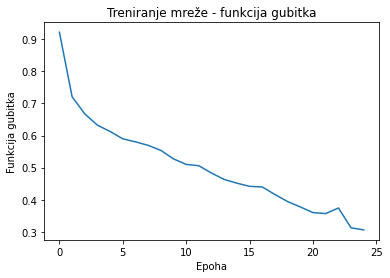

In [268]:
plt.title('Treniranje mreže - funkcija gubitka')
plt.xlabel('Epoha')
plt.ylabel('Funkcija gubitka')
plt.plot(history.epoch, history.history['loss'])

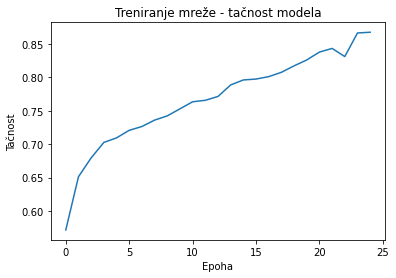

In [269]:
plt.title('Treniranje mreže - tačnost modela')
plt.xlabel('Epoha')
plt.ylabel('Tačnost')
plt.plot(history.epoch, history.history['accuracy'])

In [271]:
model.save('cnn_raw.hdf5')

In [ ]:
#from keras.models import load_model
#model_revived = load_model('cnn_raw.hdf5')

In [284]:
y_pred = model.predict(X_test,type=)
y_test=y_test-1

In [287]:
y_pred=np.argmax(y_pred,axis=1)

In [289]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       690
           1       0.71      0.69      0.70       690
           2       0.71      0.68      0.70       690
           3       0.82      0.82      0.82       690
           4       0.75      0.81      0.78       690

    accuracy                           0.80      3450
   macro avg       0.80      0.80      0.80      3450
weighted avg       0.80      0.80      0.80      3450



In [294]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[679   8   2   1   0]
 [  7 478 145  16  44]
 [  3 174 471   8  34]
 [  0   4  12 568 106]
 [  0   8  29  97 556]]


(5.5, -0.5)

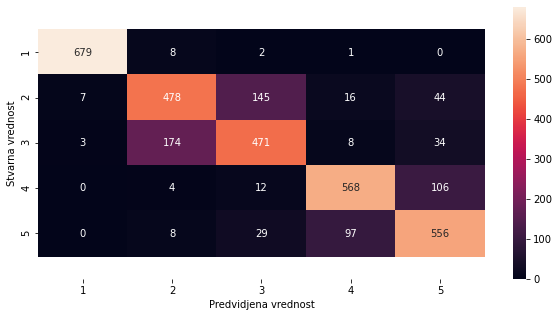

In [296]:
import seaborn
df_cm = pd.DataFrame(cm, index = classes, columns=classes)
plt.figure(figsize = (10, 5))
ax = seaborn.heatmap(df_cm, annot=True, fmt="d")
ax.set_ylabel('Stvarna vrednost')
ax.set_xlabel('Predvidjena vrednost')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Furijeova transformacija

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, stratify = y,random_state = 1996)

In [ ]:
scaler_train = preprocessing.StandardScaler()
scaler_train.fit(X_train)
X_train = scaler_train.transform(X_train)
X_test = scaler_train.transform(X_test)

In [192]:
X_f_train = np.fft.rfft(X_train, axis=1).astype(float)
X_f_test = np.fft.rfft(X_test, axis=1).astype(float)

c:\users\ana\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
c:\users\ana\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [ ]:
X_train.shape

In [ ]:
X_f_train.shape

In [ ]:
X_f_train = X_f_train.reshape(X_f_train.shape[0], X_f_train.shape[1], 1)
X_f_test = X_f_test.reshape(X_f_test.shape[0], X_f_test.shape[1], 1)

In [ ]:
input_shape = (X_f_train.shape[1], 1)

In [ ]:
def mreza(input_shape, num_classes,window, dropout):
    model = Sequential()
    model.add(Conv1D(filter_cnn, window, activation='relu', input_shape=input_shape))
    model.add(Conv1D(filter_cnn, window, activation='relu'))
    model.add(MaxPooling1D(pool))
    model.add(Conv1D(filter_cnn * 2, window, activation='relu'))
    model.add(Conv1D(filter_cnn * 2, window, activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(dropout))
    model.add(Dense(number_of_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
from keras.wrappers.scikit_learn  import KerasClassifier
def get_estimator(window=3,dropout=0.5):
    return KerasClassifier(build_fn=mreza,input_shape=input_shape, num_classes=num_classes,window=window, dropout=dropout,epochs=epochs)

In [ ]:
estimator = get_estimator()

In [ ]:
grid_cnn_f = model_selection.GridSearchCV(estimator, param_grid=cnn_par_f, scoring=scoring, cv=10, refit='accuracy', return_train_score=True)

In [ ]:
grid_cnn_f.fit(X_f_train, y_train)